# Titanic Classification

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings ("ignore")

In [2]:
#reading the dataset 
df=pd.read_csv("C:/Users/somaa/Downloads/train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# About the dataset
pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower
Survival	0 = No, 1 = Yes
embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton
sibsp	# of siblings / spouses aboard the Titanic
parch	# of parents / children aboard the Titanic

# Preprocessing

In [3]:
#checking for missing values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
#dropping "CABIN" column since we can't fill it with any different value
df=df.drop(columns="Cabin",axis=1)

In [5]:
#filling missing value in AGE column with mean ages
age=df.Age.mean()
df['Age'].fillna(age, inplace=True)


In [6]:
#filling missing values in EMBARKED column with mode
mode=df.Embarked.mode()
df["Embarked"].fillna(df["Embarked"].mode()[0],inplace=True)

In [7]:
#checking for missing values
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

# Data Exploration

In [8]:
#to count number of passengers
df.shape

(891, 11)

In [9]:
#to check how many passengers survived and how many did not (0=not survived, 1=survived)
df["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

We can see from the above data that out of 891 passengers 342 (38%) survived and 549 (62%) did not survive

In [10]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
#dropping columns with categorical value such as Name and Ticket
df=df.drop(columns=["Name","Ticket"],axis=1)
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [12]:
df.groupby("Fare").mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch
Fare,,,,,,
0.0000,516.40,0.066667,1.933333,32.239529,0.00,0.000000
4.0125,379.00,0.000000,3.000000,20.000000,0.00,0.000000
5.0000,873.00,0.000000,1.000000,33.000000,0.00,0.000000
6.2375,327.00,0.000000,3.000000,61.000000,0.00,0.000000
6.4375,844.00,0.000000,3.000000,34.500000,0.00,0.000000
...,...,...,...,...,...,...
227.5250,589.25,0.750000,1.000000,31.924779,0.25,0.000000
247.5208,209.50,0.500000,1.000000,37.000000,0.00,1.000000
262.3750,527.50,1.000000,1.000000,19.500000,2.00,2.000000


We can infer that passengers with a higher fare ticket had more survival rate

Text(0.5, 1.0, 'passengers survival')

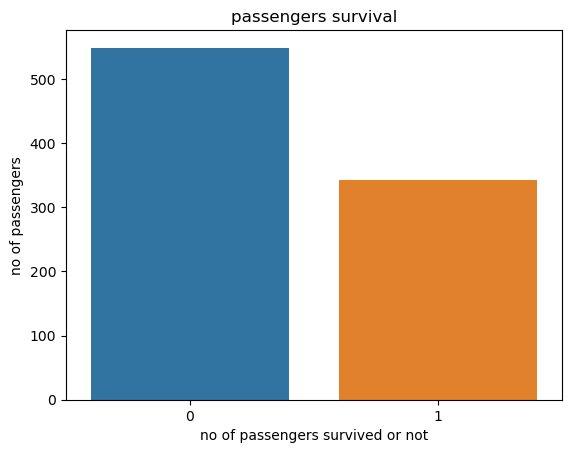

In [13]:
sns.countplot(x="Survived",data=df)
plt.xlabel("no of passengers survived or not")
plt.ylabel("no of passengers")
plt.title("passengers survival")

Text(0.5, 1.0, 'effect of gender of passenger on survival')

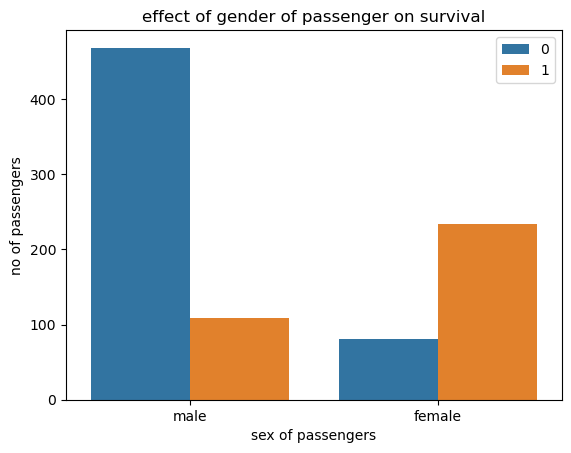

In [14]:
sns.countplot(x="Sex",data=df, hue="Survived")
plt.xlabel("sex of passengers")
plt.ylabel("no of passengers")
plt.legend()
plt.title("effect of gender of passenger on survival")

Text(0.5, 1.0, 'effect of class of passenger on survival')

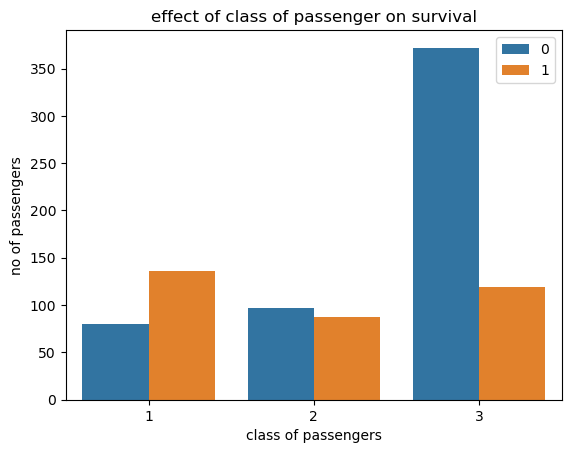

In [15]:
sns.countplot(x="Pclass",data=df, hue="Survived")
plt.xlabel("class of passengers")
plt.ylabel("no of passengers")
plt.legend()
plt.title("effect of class of passenger on survival")

Text(0.5, 1.0, 'effect of Port of Embarkation of passenger on survival')

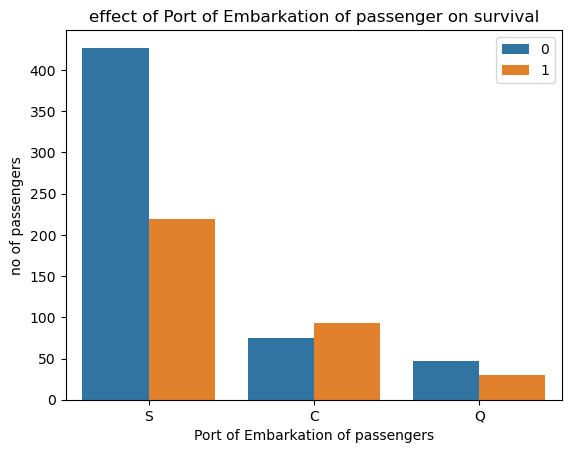

In [16]:
sns.countplot(x="Embarked",data=df, hue="Survived")
plt.xlabel("Port of Embarkation of passengers")
plt.ylabel("no of passengers")
plt.legend()
plt.title("effect of Port of Embarkation of passenger on survival")

We can infer the following from above data
1. More number of females survived as compared to males
2. People from 3rd class had very low chances of survival
3. Passengers who embarked from Southampton had low chances of survival

in Sex column 1=male and 0=female
in Embarked column 1=S, 0=C and 2=Q

In [17]:
X = df.copy()
y = X.pop("Survived")

In [18]:
# Label encoding for categoricals
for colname in X.select_dtypes("object"):
    X[colname], _ = X[colname].factorize()
# All discrete features should now have integer dtypes
discrete_features = X.dtypes == int

In [19]:
from sklearn.feature_selection import mutual_info_regression

def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X, y, discrete_features)
mi_scores 

Sex            0.127352
Fare           0.109941
Pclass         0.061231
Age            0.045733
Embarked       0.037196
PassengerId    0.018757
Parch          0.005930
SibSp          0.001856
Name: MI Scores, dtype: float64

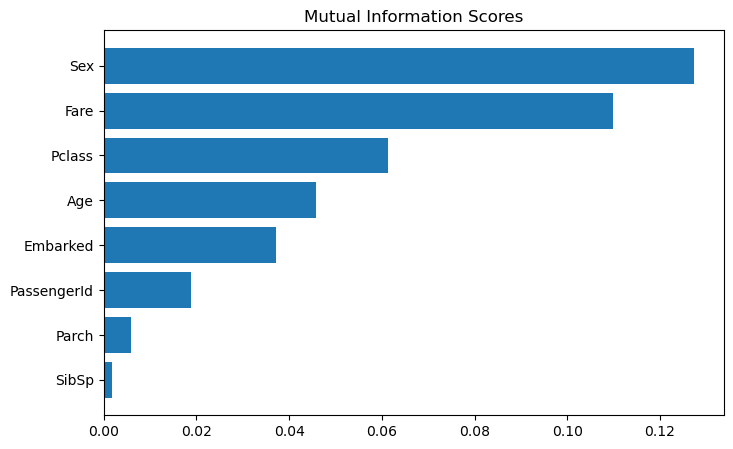

In [20]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")


plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)

We will use the following parameters for fitting
1. Sex,Fare, Pclass


For prediction we will use the following parameter
1. Survived

In [21]:
#encoding columns with categorical values such as SEX
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df.Sex=le.fit_transform(df.Sex)

In [22]:
#splitting the dataset in x and y for fitting and prediction
X=df.drop(columns=["PassengerId","Survived","SibSp","Parch","Age",'Embarked'],axis=1)
y=df.Survived

In [23]:
#splitting dateset in training and testing dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
#we are using 80% of our data for training and rest 20% for testing

In [24]:
#importing libraries
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm

In [25]:
model_params={
    "logistic_regression":{"model": LogisticRegression(solver='liblinear',multi_class='auto'),
                          'params': {'C': [0.001, 0.01, 0.1, 1, 10],
                                     'penalty': ['l1', 'l2'],
                                     'solver': ['liblinear', 'lbfgs', 'newton-cg', 'sag', 'saga'],
                                     'max_iter': [5, 10, 15]
                                    }
                          },
    "random_forest" : {"model" : RandomForestClassifier(),
                      "params": {"n_estimators":[1,5,10]}
                      },
    "gaussian" : {"model" : GaussianNB(),
                 "params": {'priors': [None, [0.25, 0.75], [0.5, 0.5]],
                            'var_smoothing': [1e-9, 1e-7, 1e-5]}
                 },
    'svm': {'model': svm.SVC(gamma='auto'),
            'params' : {'C': [1,10,20],
                        'kernel': ['rbf','linear']}  
           }
}

In [26]:
#model selection
from sklearn.model_selection import GridSearchCV
scores=[]
for model_name, mp in model_params.items():
    clf=GridSearchCV(mp["model"], mp["params"], cv=5, return_train_score=False)
    clf.fit(X_train,y_train)
    scores.append({
        "model": model_name,
        "best_score": clf.best_score_,
        "best_params": clf.best_params_
    })

df1 = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df1

,model,best_score,best_params
0,logistic_regression,0.787935,"{'C': 0.1, 'max_iter': 5, 'penalty': 'l1', 'so..."
1,random_forest,0.820299,{'n_estimators': 10}
2,gaussian,0.776677,"{'priors': None, 'var_smoothing': 1e-05}"
3,svm,0.800621,"{'C': 20, 'kernel': 'rbf'}"
